# Conversi칩n An치logo a Digital (ADC)

Objetivos:


1.   Conocer, entender e implementar el proceso ADC
2.   Comprender, manipular y analizar diferentes cambios que ocurren en las se침ales durante el proceso de ADC cuando se modifican ciertos par치metros, e.g., frecuencia de muestreo, n칰mero de bits de cuantizaci칩n, etc.



# Funciones

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
from IPython.display import Audio, display
import warnings
warnings.filterwarnings('ignore')
def sample_and_hold(t_org, signal, fs_ori, fs_dest):
  t_dest = 1/fs_dest
  i = 0
  signal_resample = np.zeros(len(signal))
  samples = []
  t_sample= []
  while i* t_dest < max(t_org):
    idx_sample = np.where((t_org >= i *t_dest) & (t_org < i + 1 * t_dest))[0]
    signal_resample[idx_sample[0]: idx_sample[-1] +1 ] = signal[idx_sample[0]]
    samples.append(signal[idx_sample[0]])
    t_sample.append(i *t_dest)
    i += 1
  return signal_resample, t_sample, samples


def fxquant (s , bit ) :
  # s : se침al de entrada normalizada entre -1 y 1
  # bit : bits de cuantizacion
  Plus1 = np.power(2,(bit-1))
  X = s*Plus1
  X = np.round(X)
  X = np.minimum(Plus1-1.0, X)
  X = np.maximum(-1.0*Plus1,X)
  X = X/Plus1
  return X

def plot_spectrogram(data, fs):
  '''
  Parameter:
  data: se침al a la que se le calcula el espectrograma
  fs: frecuencia de muestreo de la se침al
  '''
  # Resoluci칩n del espectrograma
  num =  1024
  hop = num//8

  stft = np.abs(librosa.stft(data,  n_fft=num, hop_length=hop  ))
  D = librosa.amplitude_to_db(stft, ref = np.max)
  spec = librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='linear', cmap=None, hop_length=hop)

## Se침al senoidal

(1)   Cree una se침al senoidal con una $f_{max} = 10 kHz$. Construya una figura que muestre 3 periodos de la se침al.

(2)   Use la funci칩n 'sample_and_hold' (provista en esta gu칤a) para realizar el muestreo de la se침al usando las diferentes frecuencias que se presentan a continuaci칩n: $\frac{f_{max}}{4}, \frac{f_{max}}{2}, f_{max}, 2f_{max}$.

(3)  Use la funci칩n 'fxquant' (provista en esta gu칤a) para realizar el proceso de cuantizaci칩n. Luego cambie la cantidad de bits de cuantizaci칩n usando: $2, 3, 4, 5, \text{y } 6 $ bits


Grafico se침al Senoidal 1.1


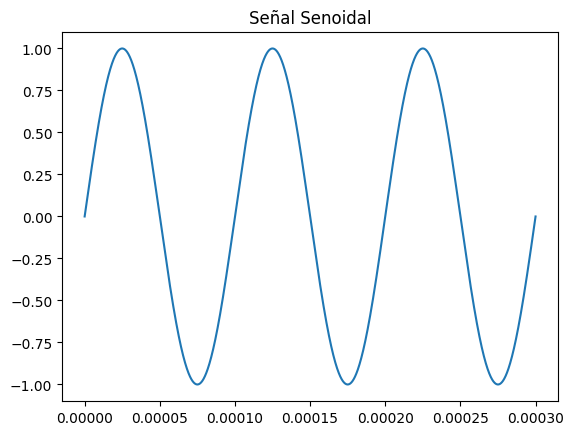

Grafico se침al muestreada 1.2


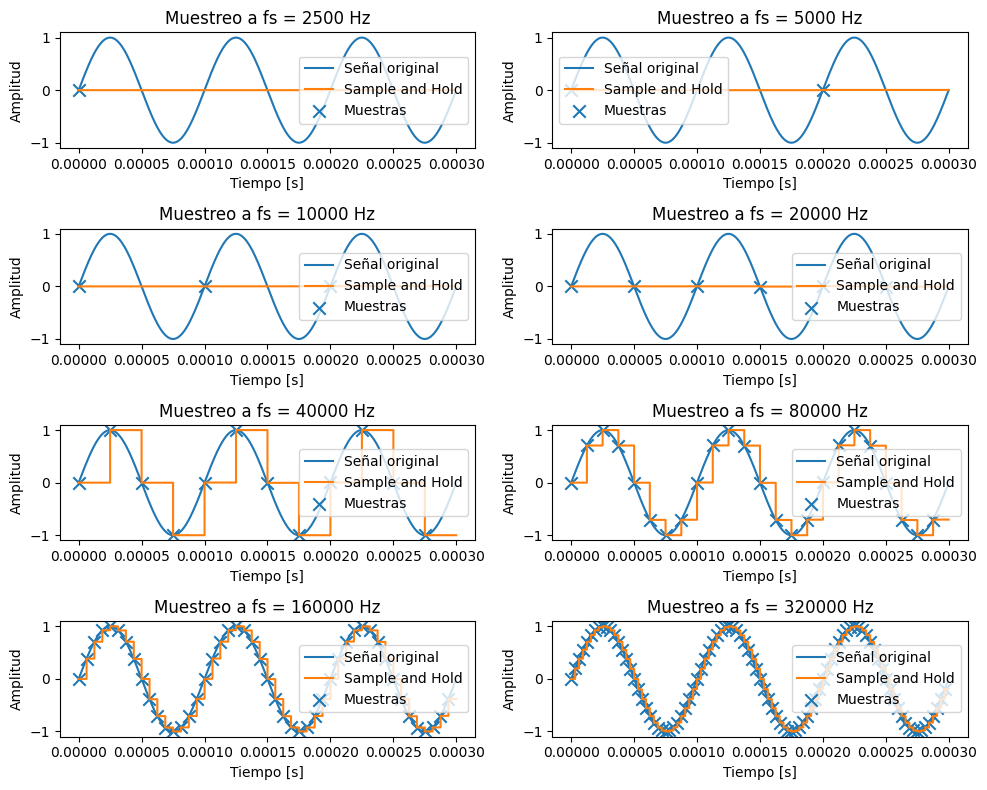

Grafico se침al cuantizada 1.3


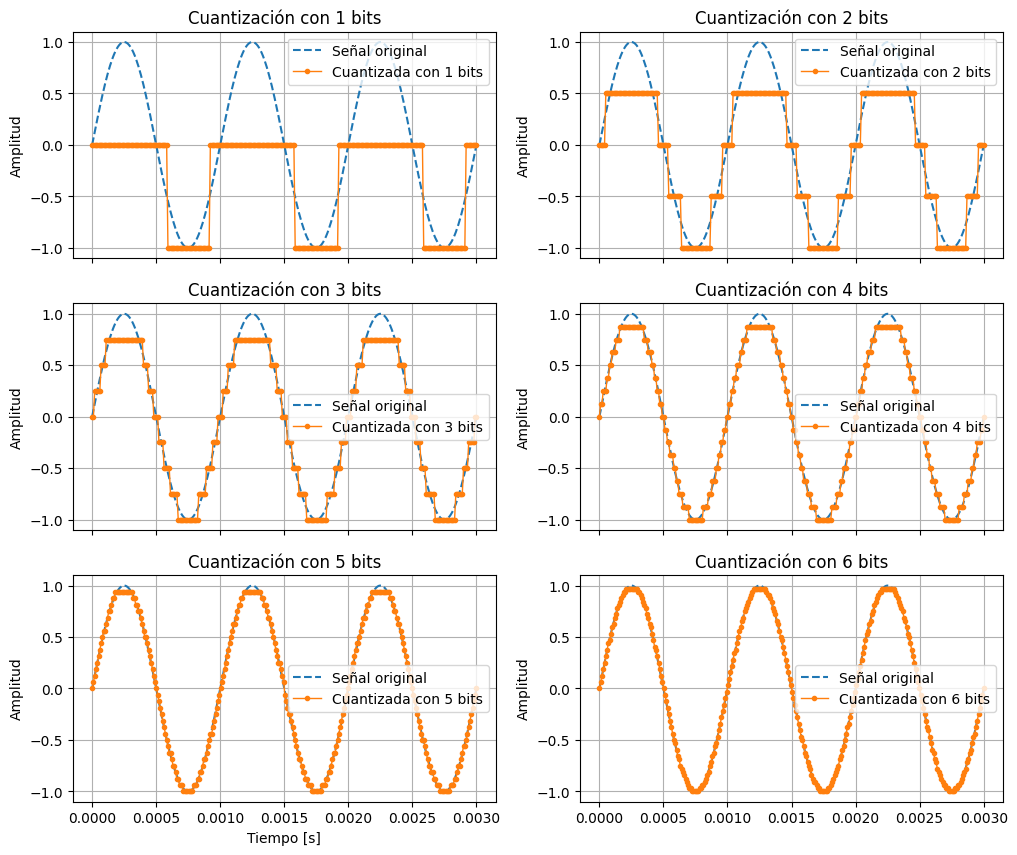

In [2]:
#Solucion Se침al Senoidal
def ejercicio1_1(frecuencia=10000, muestras_por_ciclo=1000, ciclos=3, graficar=0):
    periodo = 1 / frecuencia  # Periodo de la se침al
    t = np.linspace(0, ciclos * periodo, ciclos * muestras_por_ciclo)
    senal = np.sin(2 * np.pi * frecuencia * t)
    if graficar == 1:
        plt.plot(t, senal)
        plt.title('Se침al Senoidal')
        plt.show()

    return senal, t

def ejercicio1_2():
    f_max = 10_000  # Hz

    # Generamos la se침al original (3 per칤odos) con alta resoluci칩n
    muestras_por_ciclo = 1000   
    ciclos = 3
    senal, t = ejercicio1_1(f_max, muestras_por_ciclo, ciclos)

    # Frecuencia de muestreo "original"
    fs_ori = f_max * muestras_por_ciclo  

    # Definimos las diferentes frecuencias de muestreo
    fs_list = [f_max/4, f_max/2, f_max, 2*f_max, 4*f_max, 8*f_max, 16*f_max, 32*f_max]

    plt.figure(figsize=(10, 8))

    for i, fs_dest in enumerate(fs_list, start=1):
        # Obtenemos la se침al muestreada con sample-and-hold
        s_resample, t_samp, samples = sample_and_hold(t, senal, fs_ori, fs_dest)
        
        plt.subplot(4, 2, i)
        # Se침al original
        plt.plot(t, senal, label='Se침al original')
        # Se침al sample-and-hold (onda escalonada)
        plt.step(t, s_resample, where='post', label='Sample and Hold')
        # Puntos de muestreo 
        plt.scatter(t_samp, samples, marker='x', s=80, label='Muestras')
        
        plt.title(f'Muestreo a fs = {fs_dest:.0f} Hz')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Amplitud')
        plt.legend()

    plt.tight_layout()
    plt.show()

def ejercicio1_3():
    # Par치metros de la se침al
    frecuencia = 1000          
    muestras_por_ciclo = 100    
    ciclos = 3                
    
    # Generar la se침al original
    senal, t = ejercicio1_1(frecuencia, muestras_por_ciclo, ciclos, 0)
    
    # Lista de bits para cuantizaci칩n
    bits_list = [1, 2, 3, 4, 5, 6]
    
    # Crear subplots: 3 filas, 2 columnas
    fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)
    axes = axes.flatten()  # Convertir a lista el plt
    
    for ax, bits in zip(axes, bits_list):
        # Cuantizaci칩n de la se침al con el n칰mero de bits actual
        senal_cuantizada = fxquant(senal, bits)
        
        # Graficar la se침al original (l칤nea discontinua) y la cuantizada
        ax.plot(t, senal, label='Se침al original', linestyle='--')
        ax.plot(t, senal_cuantizada, label=f'Cuantizada con {bits} bits', marker='o', markersize=3, linewidth=1)
        ax.set_title(f'Cuantizaci칩n con {bits} bits')
        ax.set_ylabel('Amplitud')
        ax.legend()
        ax.grid(True)
    
    axes[-2].set_xlabel('Tiempo [s]') 
    plt.show()
print("Grafico se침al Senoidal 1.1")
ejercicio1_1(10000, 1000, 3, graficar=1)
print("Grafico se침al muestreada 1.2")
ejercicio1_2()
print("Grafico se침al cuantizada 1.3")
ejercicio1_3()


## Se침al de audio

Repita los procesos de muestreo y cuantizaci칩n para el archivo de audio
'sample.wav' el cual fue grabado a una frecuencia de muestreo de 8000Hz. Para el proceso de muestreo de la se침al de audio use la funci칩n 'resample' de la libreria scipy.signal ya que la funci칩n sample_and_hold no es eficiente pues est치 pensada meramente para fines educativos/ilustrativos.

(1) Analice el comportamiento de un segmento de 40ms de la se침al muestreada. Compare el resultado de este segmento para diferentes valores de Fs respecto a la se침al original. Analice y concluya.

(2) Considere nuevamente la se침al de audio completa ('sample.wav') y segmente un pedazo de 500ms. Usando la funci칩n 'plot_spectrogram' (provista en esta gu칤a), analice los resultados que se obtenienen a nivel espectral al muestrear a las diferentes frecuencias Fs. Analice y concluya. Aseg칰rese de usar los mismos l칤mites para los ejes en todas las figuras.

(3) Escuche c칩mo cambia el audio completo a medida que cambian los diferentes valores de la Fs.

(4) Considere nuevamente el segmento de 20ms y analice el efecto de variar la cantidad de bits de cuantizaci칩n. Analice y concluya.

(5) Tome nuevamente el segmento de 500ms de audio y use la funci칩n 'plot_spectrogram' (provista en esta gu칤a) para analizar el efecto que tiene cambiar la cantidad de bits de cuantizaci칩n. Analice y concluya.

(6) Escuche c칩mo cambia el audio completo a medida que cambia la cantidad de bits de cuantizaci칩n.

(7) Compare los espectrogramas antes construidos con el espectrograma calculado para todo el audio completo ('sample.wav').


comportamiento de la se침al Muestreada 2.1


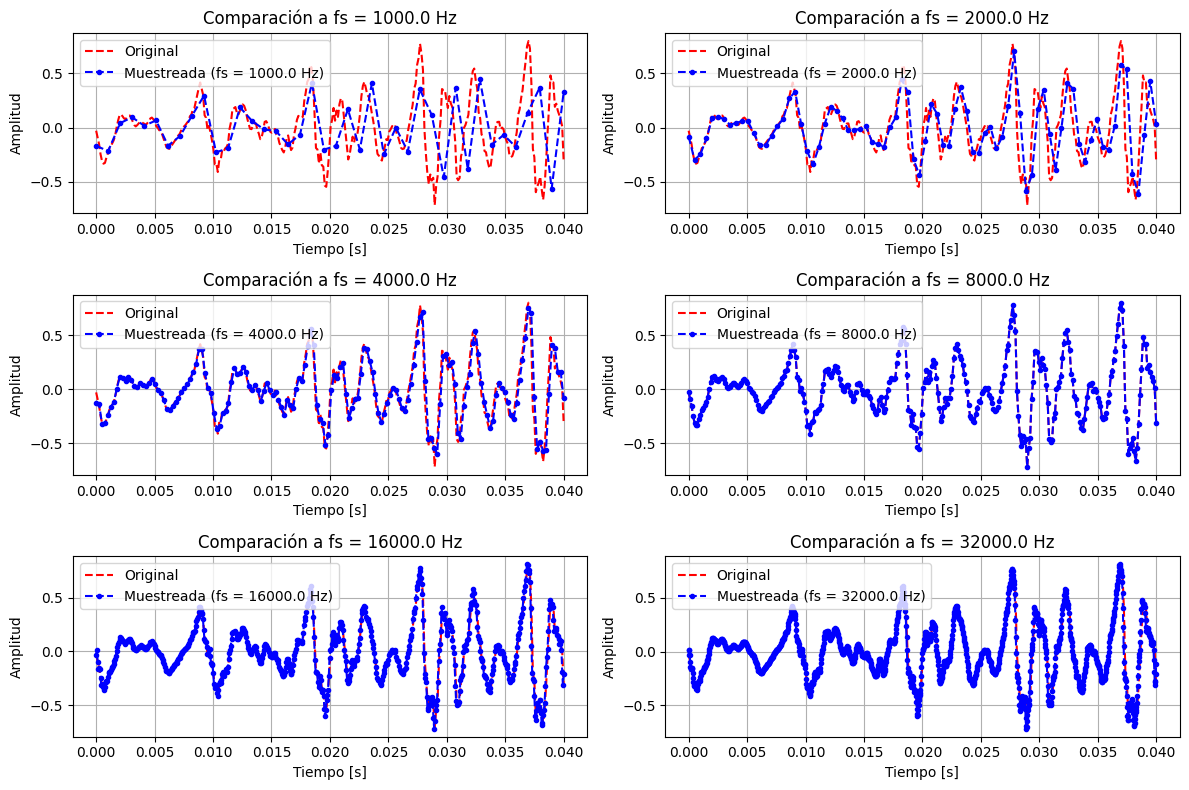

espectrograma de la se침al Muestreada 2.2


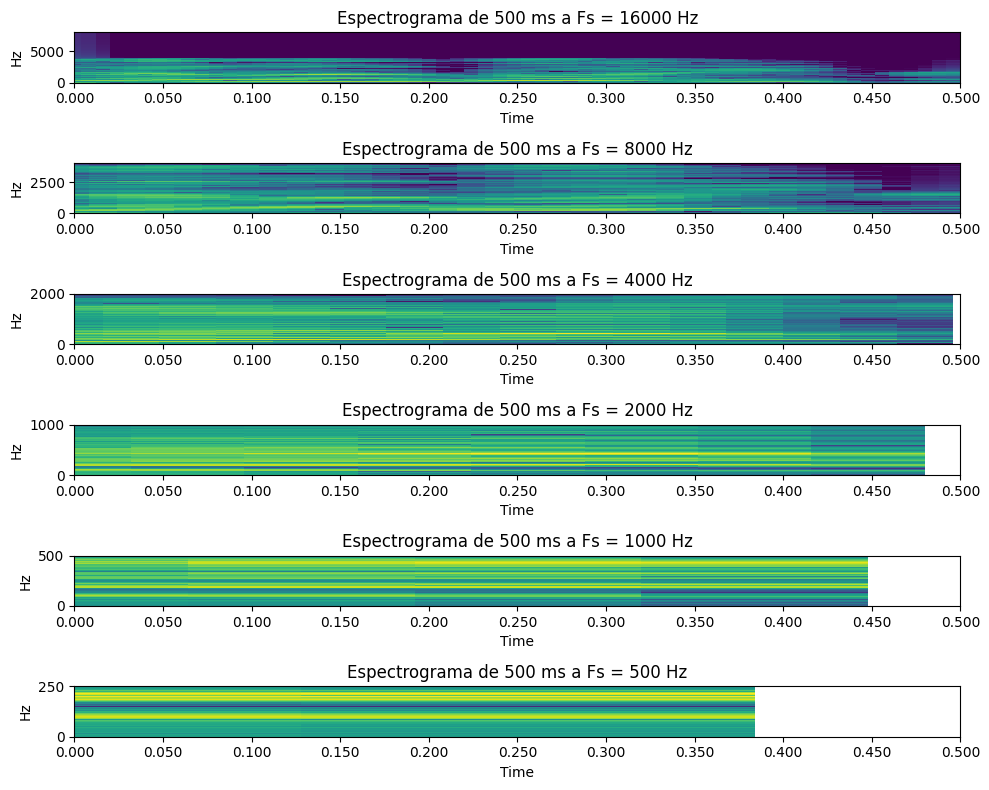

reproduccion de la se침al Muestreada 2.3

游꿚 Audio a 8000 Hz:



游꿚 Audio a 4000 Hz:



游꿚 Audio a 2000 Hz:



游꿚 Audio a 1000 Hz:


Comportamiento de la se침al Cuantizada 2.4


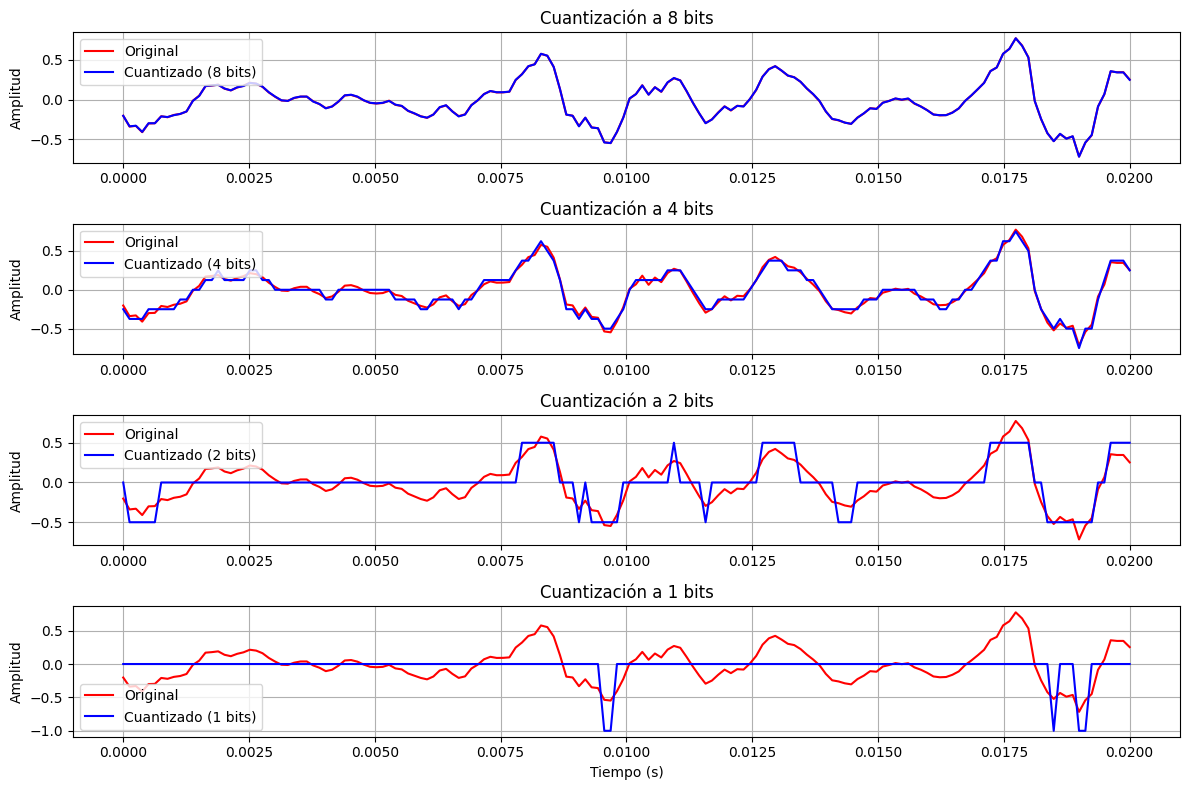

Espectrograma de la se침al Cuantizada 2.5


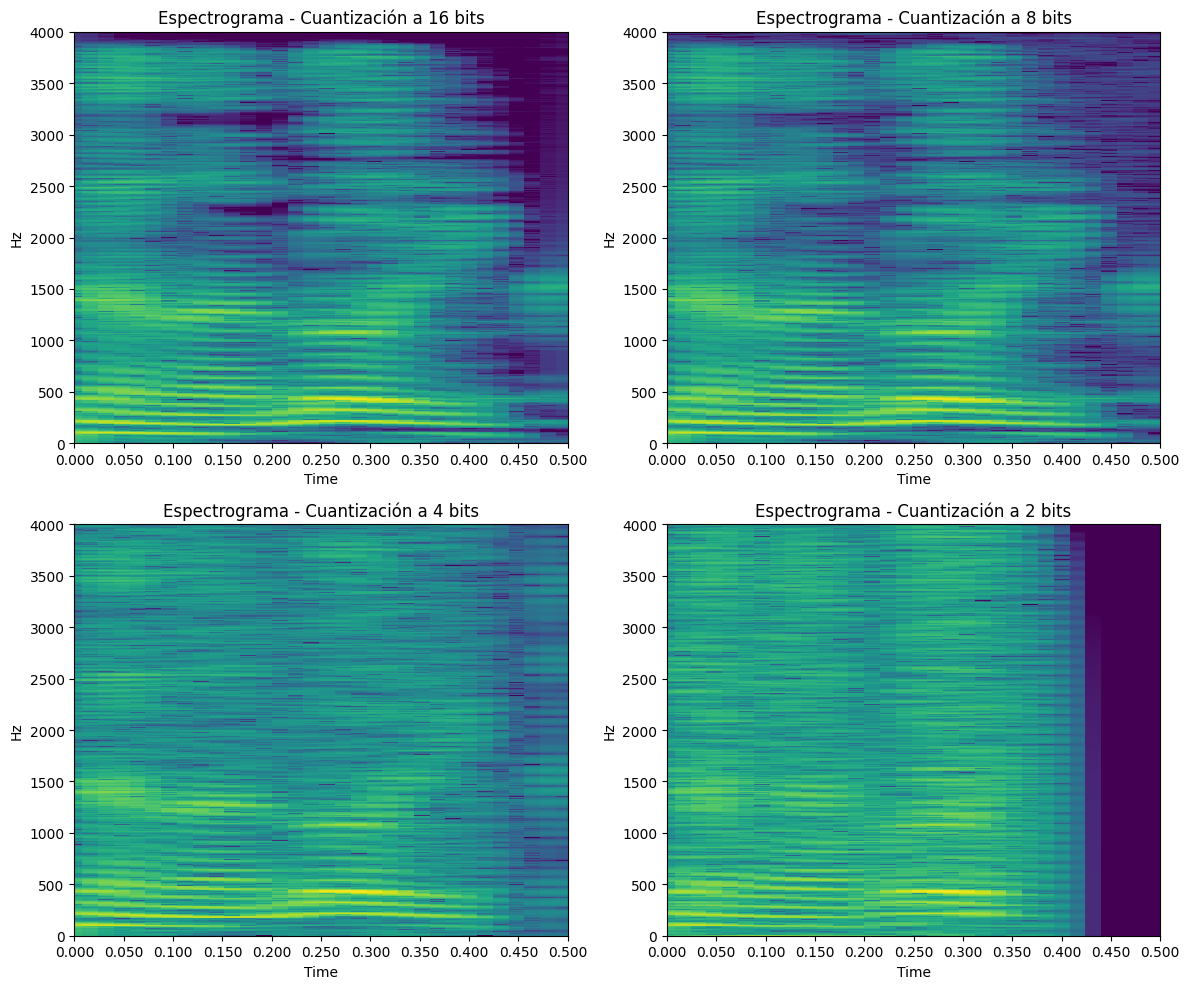

Reproduccion de la se침al Cuantizada 2.6

游꿚 Reproduciendo audio completo a 16 bits:



游꿚 Reproduciendo audio completo a 8 bits:



游꿚 Reproduciendo audio completo a 4 bits:



游꿚 Reproduciendo audio completo a 2 bits:



游꿚 Reproduciendo audio completo a 1 bits:


Espectrograma de toda el audio 2.7


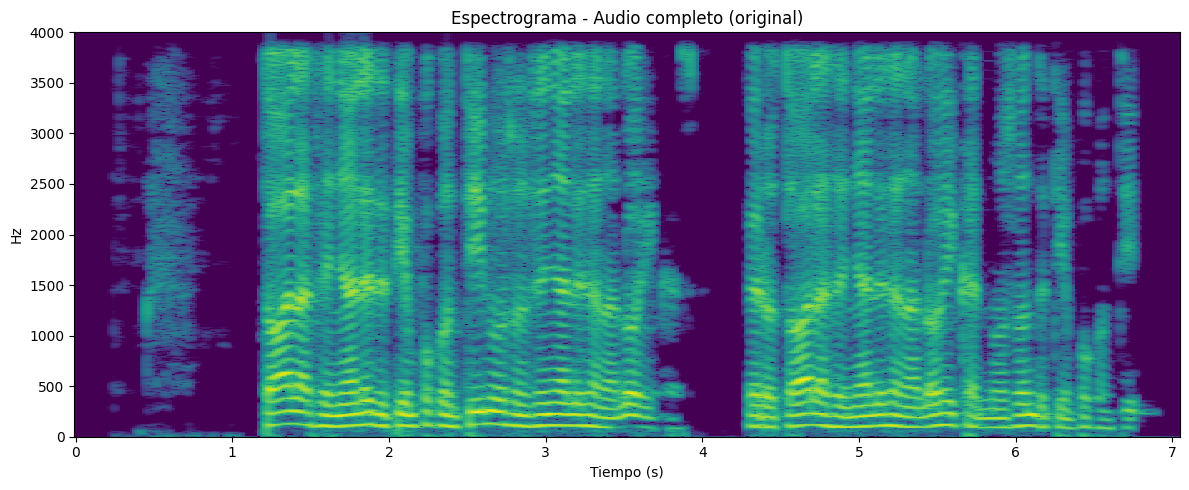

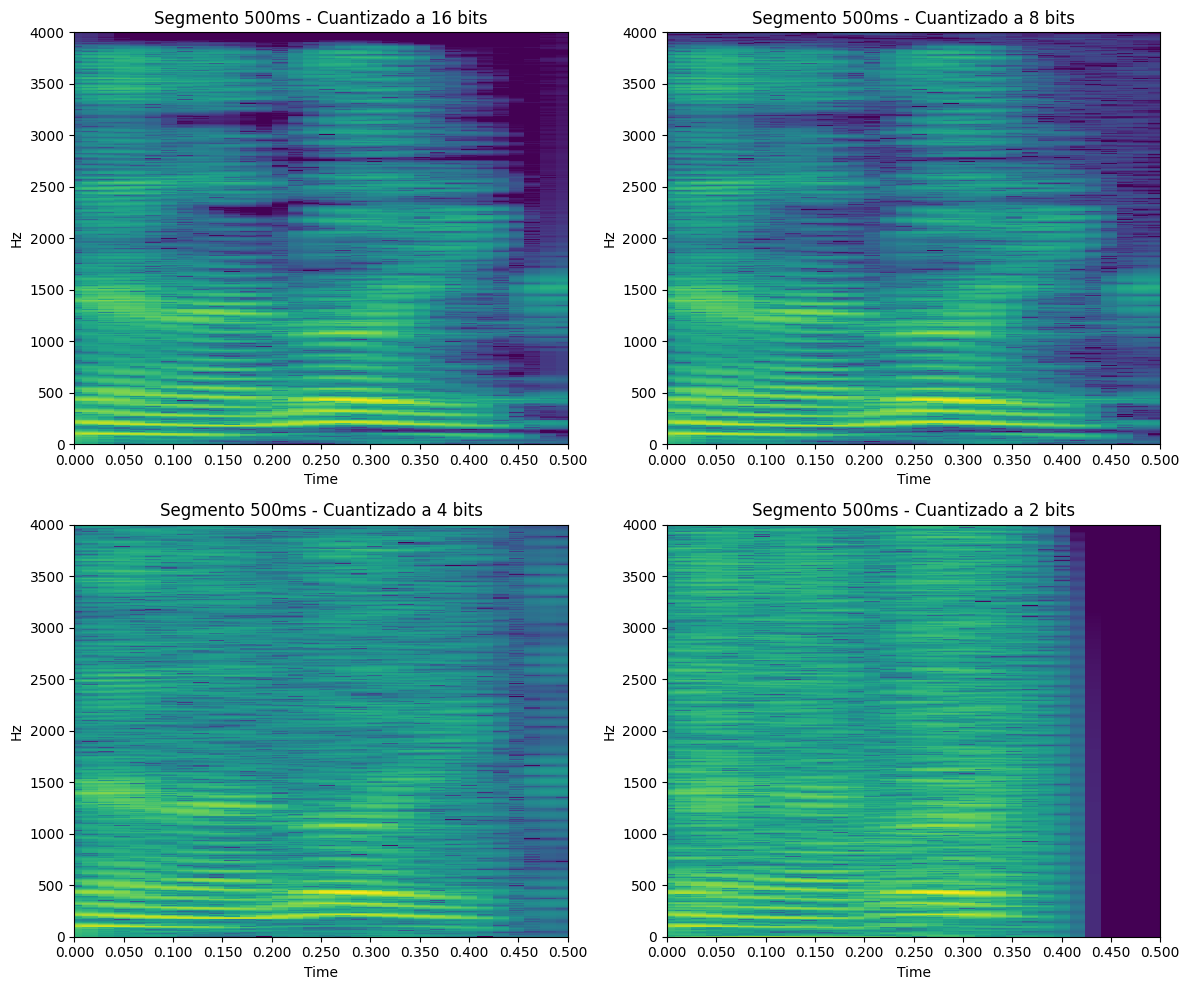

In [5]:
def ejercicio2_1(audio_path):
    signal, fs = librosa.load(audio_path, sr=None)
    
    # Convertir a mono si es necesario
    if signal.ndim > 1:
        signal = signal.mean(axis=0)

    # Duraci칩n de 40 ms en muestras
    duration_ms = 40
    duration_samples = int((duration_ms / 1000) * fs)

    # Seleccionar 40 ms desde la mitad del audio
    mid_point = len(signal) // 2
    start_sample = max(0, mid_point - duration_samples // 2)
    end_sample = min(len(signal), start_sample + duration_samples)
    signal_segment = signal[start_sample:end_sample]

    fs_dests = [fs/8, fs / 4, fs / 2, fs, fs * 2, fs * 4]

    plt.figure(figsize=(12, 8))

    for i, fs_dest in enumerate(fs_dests, start=1):
        # Muestrear signal_segment con la frecuencia fs_dest
        num_samples = int(len(signal_segment) * fs_dest / fs)
        signal_resample = resample(signal_segment, num_samples)

        # Graficar la se침al original y la muestreada
        plt.subplot(3, 2, i)
        t_original = np.linspace(0, duration_ms / 1000, len(signal_segment))
        t_resample = np.linspace(0, duration_ms / 1000, num_samples)
        plt.plot(t_original, signal_segment, label='Original', linestyle='--', color='red', alpha=1)
        plt.plot(t_resample, signal_resample, label=f'Muestreada (fs = {fs_dest:.1f} Hz)', color='blue', linestyle='--', marker='o', markersize=3)
        plt.title(f'Comparaci칩n a fs = {fs_dest:.1f} Hz')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Amplitud')
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

def ejercicio2_2(audio_path):

    data, fs_original = librosa.load(audio_path, sr=None)  # sr=None para conservar Fs original

# Extraemos 500 ms (0.5 segundos):
    segment_duration = 0.5
    N = int(segment_duration * fs_original)
    mid_point = len(data) // 2
    start_sample = max(0, mid_point - N // 2)
    end_sample = min(len(data), start_sample + N)
    segment_500ms = data[start_sample:end_sample]

    # Distintas frecuencias de muestreo a evaluar
    Fs_list = [16000, 8000, 4000, 2000, 1000, 500]

    plt.figure(figsize=(10, 8))

    for i, Fs in enumerate(Fs_list):
        # Resampleamos el mismo segmento de 500 ms a Fs
        segment_resampled = librosa.resample(segment_500ms, orig_sr=fs_original, target_sr=Fs)
        
        plt.subplot(len(Fs_list), 1, i+1)
        plot_spectrogram(segment_resampled, Fs)
        
        # Mantener ejes consistentes (hasta 0.5 s en tiempo y ~22 kHz en frecuencia)
        plt.xlim([0, 0.5])    # Hasta 0.5 s
        plt.ylim([0, Fs/2]) 
        plt.title(f"Espectrograma de 500 ms a Fs = {Fs} Hz")

    plt.tight_layout()
    plt.show()

def ejercicio2_3(audio_path):
    audio, fs_original = librosa.load(audio_path, sr=8000)

    fs_list = [8000, 4000, 2000, 1000]
    for fs_target in fs_list:
        tramo = librosa.resample(audio, orig_sr=fs_original, target_sr=fs_target)
        
        print(f"\n游꿚 Audio a {fs_target} Hz:")
        display(Audio(tramo, rate=fs_target))
def ejercicio2_4(audio_path):

    audio, fs = librosa.load(audio_path, sr=None)

    # Extraer segmento de 20 ms desde el centro
    duration_ms = 20
    segment_samples = int((duration_ms / 1000) * fs)
    center = len(audio) // 2
    start = center - segment_samples // 2
    end = start + segment_samples
    segment = audio[start:end]

    # Funci칩n de cuantizaci칩n
    bit_depths = [8, 4, 2, 1]
    quantized_segments = [fxquant(segment, bits) for bits in bit_depths]
    t = np.linspace(0, duration_ms / 1000, segment_samples)

    # Graficar
    plt.figure(figsize=(12, 8))

    for i, (bits, q_segment) in enumerate(zip(bit_depths, quantized_segments)):
        plt.subplot(len(bit_depths), 1, i + 1)
        plt.plot(t, segment, label='Original', color='red', alpha=1)
        plt.plot(t, q_segment, label=f'Cuantizado ({bits} bits)', color='blue')
        plt.title(f'Cuantizaci칩n a {bits} bits')
        plt.ylabel('Amplitud')
        plt.grid(True)
        plt.legend()

    plt.xlabel('Tiempo (s)')
    plt.tight_layout()
    plt.show()
def ejercicio2_5(filepath):
    # Cargar audio
    audio, fs = librosa.load(filepath, sr=None)

    # Extraer 500 ms desde el centro
    duration_ms = 500
    segment_samples = int((duration_ms / 1000) * fs)
    center = len(audio) // 2
    start = center - segment_samples // 2
    end = start + segment_samples
    segment = audio[start:end]

    # Profundidades de bits a probar
    bit_depths = [16, 8, 4, 2]
    quantized_segments = [fxquant(segment, bits) for bits in bit_depths]

    # Graficar espectrogramas
    plt.figure(figsize=(12, 10))

    for i, (bits, q_segment) in enumerate(zip(bit_depths, quantized_segments)):
        plt.subplot(2, 2, i + 1)
        plot_spectrogram(q_segment, fs)
        plt.title(f'Espectrograma - Cuantizaci칩n a {bits} bits')
        plt.ylim([0, fs // 2])  # L칤mite de Nyquist
        plt.xlim([0, 0.5])      # 500 ms

    plt.tight_layout()
    plt.show()

def ejercicio2_6(filepath):
    # Cargar audio completo
    audio, fs = librosa.load(filepath, sr=None)

    # Profundidades de bits a probar
    bit_depths = [16, 8, 4, 2, 1]

    for bits in bit_depths:
        audio_q = fxquant(audio, bits)
        print(f"\n游꿚 Reproduciendo audio completo a {bits} bits:")
        display(Audio(audio_q, rate=fs))
def ejercicio2_7(filepath):
    # Cargar audio completo
    audio, fs = librosa.load(filepath, sr=None)

    # Calcular espectrograma del audio completo
    plt.figure(figsize=(12, 5))
    plt.title("Espectrograma - Audio completo (original)")
    plot_spectrogram(audio, fs)
    plt.ylim([0, fs // 2])
    plt.xlabel("Tiempo (s)")
    plt.tight_layout()
    plt.show()

    # Extraer segmento de 500 ms desde el centro
    segment_duration_ms = 500
    N = int((segment_duration_ms / 1000) * fs)
    center = len(audio) // 2
    start = center - N // 2
    end = start + N
    segment = audio[start:end]

    # Cuantizaciones a comparar
    bit_depths = [16, 8, 4, 2]
    quantized_segments = [fxquant(segment, bits) for bits in bit_depths]

    # Graficar espectrogramas de los segmentos cuantizados
    plt.figure(figsize=(12, 10))
    for i, (bits, q_segment) in enumerate(zip(bit_depths, quantized_segments)):
        plt.subplot(2, 2, i + 1)
        plot_spectrogram(q_segment, fs)
        plt.title(f'Segmento 500ms - Cuantizado a {bits} bits')
        plt.ylim([0, fs // 2])
        plt.xlim([0, 0.5])
    plt.tight_layout()
    plt.show()
print("comportamiento de la se침al Muestreada 2.1")
ejercicio2_1("C:/Users/migue/Downloads/sample.wav")
print("espectrograma de la se침al Muestreada 2.2")
ejercicio2_2("C:/Users/migue/Downloads/sample.wav")
print("reproduccion de la se침al Muestreada 2.3")
ejercicio2_3("C:/Users/migue/Downloads/sample.wav")
print("Comportamiento de la se침al Cuantizada 2.4")
ejercicio2_4("C:/Users/migue/Downloads/sample.wav")
print("Espectrograma de la se침al Cuantizada 2.5")
ejercicio2_5("C:/Users/migue/Downloads/sample.wav")
print("Reproduccion de la se침al Cuantizada 2.6")
ejercicio2_6("C:/Users/migue/Downloads/sample.wav")
print("Espectrograma de toda el audio 2.7")
ejercicio2_7("C:/Users/migue/Downloads/sample.wav")
